In [8]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

data = pd.read_csv("C:/tmp/Ml_Project/dataset/transaction_anomalies_dataset.csv")
print(data.head())

  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [9]:
print(data.isnull().sum())

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


In [11]:
print(data.describe())

       Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.245225                     8.361258    13.8199

In [12]:
# Distribution of Transaction Amount
fig_amount = px.histogram(data, x='Transaction_Amount',
                          nbins=20,
                          title='Distribution of Transaction Amount')


In [13]:
fig_amount.show()

In [14]:
# Transaction Amount by Account Type
fig_box_amount = px.box(data,
                        x='Account_Type',
                        y='Transaction_Amount',
                        title='Transaction Amount by Account Type')
fig_box_amount.show()

In [15]:
# Average Transaction Amount vs. Age
fig_scatter_avg_amount_age = px.scatter(data, x='Age',
                                        y='Average_Transaction_Amount',
                                        color='Account_Type',
                                        title='Average Transaction Amount vs. Age',
                                        trendline='ols')
fig_scatter_avg_amount_age.show()

In [16]:
# Count of Transactions by Day of the Week
fig_day_of_week = px.bar(data, x='Day_of_Week',
                         title='Count of Transactions by Day of the Week')
fig_day_of_week.show()

In [17]:
# Correlation Heatmap
correlation_matrix = data.corr()
fig_corr_heatmap = px.imshow(correlation_matrix,
                             title='Correlation Heatmap')
fig_corr_heatmap.show()

C:\Users\rajes\AppData\Local\Temp\ipykernel_25556\2316172629.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [18]:
# Calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Scatter plot of Transaction Amount with anomalies highlighted
fig_anomalies = px.scatter(data, x='Transaction_Amount', y='Average_Transaction_Amount',
                           color='Is_Anomaly', title='Anomalies in Transaction Amount')
fig_anomalies.update_traces(marker=dict(size=12), 
                            selector=dict(mode='markers', marker_size=1))
fig_anomalies.show()

In [19]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


In [20]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

c:\Users\rajes\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.02, random_state=42)

In [21]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

No anomaly detected: This transaction is normal.


Accuracy: 1.0000


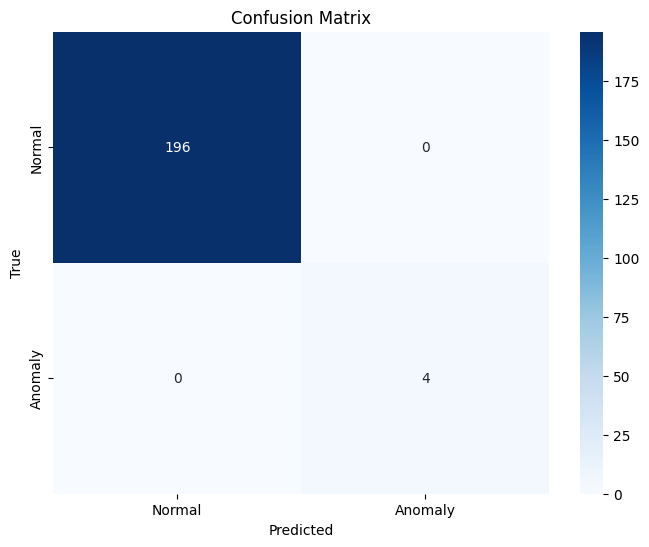

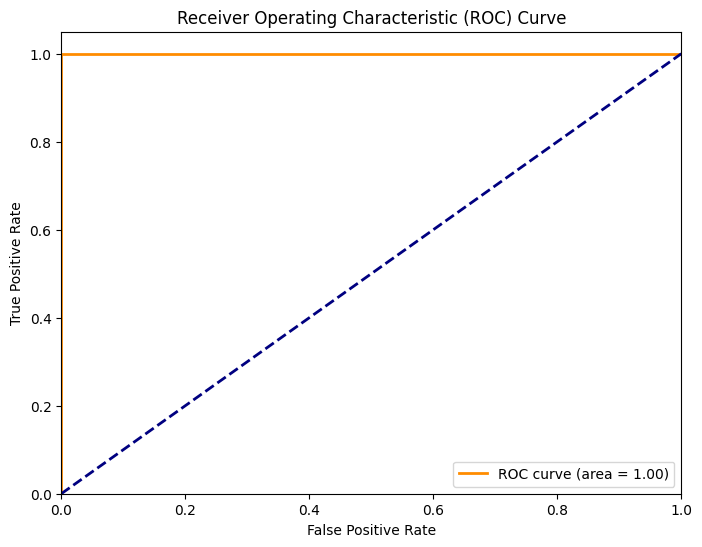

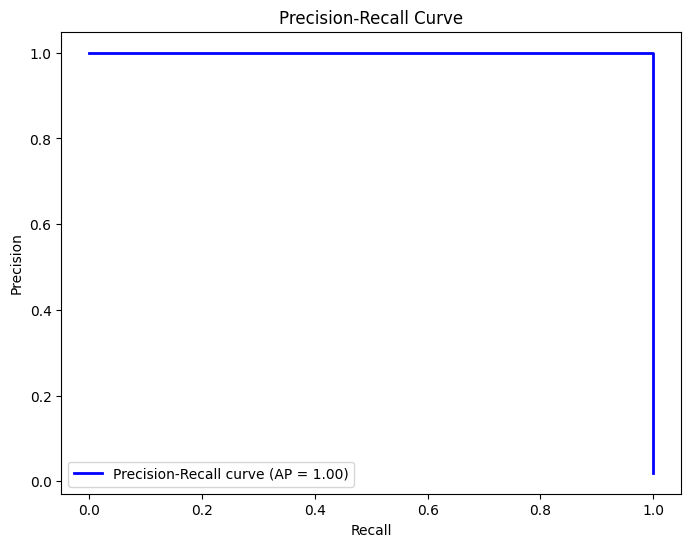

Specificity (True Negative Rate): 1.0000
Sensitivity (True Positive Rate): 1.0000
Precision: 1.0000
F1 Score: 1.0000


In [23]:
# Performance metrics without using y_pred

# Import necessary libraries for performance metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Generate fresh predictions from the model
predictions = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
predictions_binary = [1 if pred == -1 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# For better ROC curve, we can use decision_function which returns anomaly scores
anomaly_scores = model.decision_function(X_test) * -1  # Multiply by -1 so higher values = more anomalous
fpr, tpr, thresholds = roc_curve(y_test, anomaly_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, anomaly_scores)
avg_precision = average_precision_score(y_test, anomaly_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Calculate and display class-specific metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # same as recall
precision_score = tp / (tp + fp)
f1 = 2 * (precision_score * sensitivity) / (precision_score + sensitivity)

print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"F1 Score: {f1:.4f}")